# Laboratorio 7 - Data Science
## Integrantes:
### Mario Guerra - 21008
### Javier Alvarado - 21188

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import re
import string
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import unidecode
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt

## Carga de archivo a un DataFrame

In [4]:
with open('tioberny.txt', 'r', encoding='utf-16') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)

print(df)


                       id               id_str  \
0     1834281080029110288  1834281080029110288   
1     1834252464092069901  1834252464092069901   
2     1834280919336976681  1834280919336976681   
3     1834280512933732694  1834280512933732694   
4     1834279986254987428  1834279986254987428   
...                   ...                  ...   
5014  1832570119563743682  1832570119563743682   
5015  1832569640079270018  1832569640079270018   
5016  1832569563109896313  1832569563109896313   
5017  1832568528508968963  1832568528508968963   
5018  1832567980749660272  1832567980749660272   

                                                    url  \
0     https://x.com/La_ReVoluZzion/status/1834281080...   
1     https://x.com/XelaNewsGt/status/18342524640920...   
2     https://x.com/M24095273/status/183428091933697...   
3     https://x.com/carlosalbesc/status/183428051293...   
4     https://x.com/Brenda_AGN/status/18342799862549...   
...                                          

In [5]:
for column in df.columns:
    print(column)

id
id_str
url
date
user
lang
rawContent
replyCount
retweetCount
likeCount
quoteCount
bookmarkedCount
conversationId
conversationIdStr
hashtags
cashtags
mentionedUsers
links
viewCount
retweetedTweet
quotedTweet
place
coordinates
inReplyToTweetId
inReplyToTweetIdStr
inReplyToUser
source
sourceUrl
sourceLabel
media
card
_type


## Limpieza y Preprocesamiento de Datos

In [6]:
# Descargar recursos de NLTK si no están disponibles
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
df.head(5)

id               id_str  \
0  1834281080029110288  1834281080029110288   
1  1834252464092069901  1834252464092069901   
2  1834280919336976681  1834280919336976681   
3  1834280512933732694  1834280512933732694   
4  1834279986254987428  1834279986254987428   

                                                 url  \
0  https://x.com/La_ReVoluZzion/status/1834281080...   
1  https://x.com/XelaNewsGt/status/18342524640920...   
2  https://x.com/M24095273/status/183428091933697...   
3  https://x.com/carlosalbesc/status/183428051293...   
4  https://x.com/Brenda_AGN/status/18342799862549...   

                        date  \
0  2024-09-12 17:21:03+00:00   
1  2024-09-12 15:27:20+00:00   
2  2024-09-12 17:20:25+00:00   
3  2024-09-12 17:18:48+00:00   
4  2024-09-12 17:16:42+00:00   

                                                user lang  \
0  {'id': 1435062946598694914, 'id_str': '1435062...   es   
1  {'id': 956650778634145792, 'id_str': '95665077...   es   
2  {'id': 1087057038755143680, 'id_str': '1087057...   es   
3  {'id': 2881001877, 'id_str': '2881001877', 'ur...   es   
4  {'id': 3013862206, 'id_str': '3013862206', 'ur...   es   

                                          rawContent  replyCount  \
0  _\nConfirmado Compañeres,\n\nEl impuesto por l...           0   
1  #URGENTE Lo que los medios #faferos no informa...          12   
2  @IvanDuque @BArevalodeLeon Con que usaste PEGA...           0   
3  @IvanDuque @BArevalodeLeon Entre Ellos se enti...           0   
4  El presidente @BArevalodeLeon y la vicepreside...           0   

   retweetCount  likeCount  ...  coordinates  inReplyToTweetId  \
0             0          0  ...         None               NaN   
1            80        142  ...         None               NaN   
2             0          0  ...         None      1.834197e+18   
3             0          0  ...         None      1.834197e+18   
4             0          0  ...         None               NaN   

   inReplyToTweetIdStr                                      inReplyToUser  \
0                 None                                               None   
1                 None                                               None   
2  1834197215415599186  {'id': 77653794, 'id_str': '77653794', 'userna...   
3  1834197215415599186  {'id': 77653794, 'id_str': '77653794', 'userna...   
4                 None                                               None   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="https://mobile.twitter.com" rel="nofo...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                             sourceUrl          sourceLabel  \
0  http://twitter.com/download/android  Twitter for Android   
1           https://mobile.twitter.com      Twitter Web App   
2           https://mobile.twitter.com      Twitter Web App   
3  http://twitter.com/download/android  Twitter for Android   
4  http://twitter.com/download/android  Twitter for Android   

                                               media  card  \
0       {'photos': [], 'videos': [], 'animated': []}  None   
1  {'photos': [], 'videos': [{'thumbnailUrl': 'ht...  None   
2       {'photos': [], 'videos': [], 'animated': []}  None   
3       {'photos': [], 'videos': [], 'animated': []}  None   
4  {'photos': [{'url': 'https://pbs.twimg.com/med...  None   

                            _type  
0  snscrape.modules.twitter.Tweet  
1  snscrape.modules.twitter.Tweet  
2  snscrape.modules.twitter.Tweet  
3  snscrape.modules.twitter.Tweet  
4  snscrape.modules.twitter.Tweet  

[5 rows x 32 columns]

In [8]:
# Convertir texto a minúsculas.
df['rawContent'] = df['rawContent'].str.lower()

# Quitar URLs.
df['rawContent'] = df['rawContent'].apply(lambda x: re.sub(r'http\S+', '', x))

# Eliminar signos de puntuación dejando solamente @ y #.
df['rawContent'] = df['rawContent'].apply(lambda x: re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9@#\s]', '', x))

# Eliminar stopwords del conjunto de datos.
stop_words = set(stopwords.words('spanish'))

df['rawContent'] = df['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df['rawContent'].head(50)

0     confirmado compañeres impuesto @usembassyguate...
1     #urgente medios #faferos informaron ayer acerc...
2     @ivanduque @barevalodeleon usaste pegasus espi...
3     @ivanduque @barevalodeleon entienden bien cuad...
4     presidente @barevalodeleon vicepresidenta @kar...
5     @barevalodeleon hijo puta inyectó enfermedades...
6     @emisorasunidas @barevalodeleon bueno trae gua...
7     @ivanduque @barevalodeleon productiva genere p...
8     @karinherreravp presidente república @barevalo...
9     @mysservicios @barevalodeleon tampoco izmierda...
10    happening now president @barevalodeleon partic...
11    presidente @barevalodeleon participa sesión so...
12    ingreso presidente @barevalodeleon hemiciclo p...
13    @pedgar05 @barevalodeleon quisiera ver preside...
14    @mendiamariela @barevalodeleon hagan reir pres...
15    @ivanduque @barevalodeleon cobarde rata regres...
16    #envivodca presidente @barevalodeleon particip...
17    @ivanduque @barevalodeleon aproveche pida 

In [9]:
# Eliminar tweets duplicados.

df = df.drop_duplicates(subset='id')

# Extraer ID, texto del tweet, menciones, retweets, respuestas y favoritos.
df['user_id'] = df['user'].apply(lambda x: x['id'])
df['username'] = df['user'].apply(lambda x: x['username'])
df['mentioned_users'] = df['mentionedUsers'].apply(lambda mentions: [user['username'] for user in mentions])
df['in_reply_to_user_id'] = df['inReplyToUser'].apply(lambda x: x['id'] if x else None)
df['retweeted_user_id'] = df['retweetedTweet'].apply(lambda x: x['user']['id'] if x else None)

In [10]:
df

id               id_str  \
0     1834281080029110288  1834281080029110288   
1     1834252464092069901  1834252464092069901   
2     1834280919336976681  1834280919336976681   
3     1834280512933732694  1834280512933732694   
4     1834279986254987428  1834279986254987428   
...                   ...                  ...   
5014  1832570119563743682  1832570119563743682   
5015  1832569640079270018  1832569640079270018   
5016  1832569563109896313  1832569563109896313   
5017  1832568528508968963  1832568528508968963   
5018  1832567980749660272  1832567980749660272   

                                                    url  \
0     https://x.com/La_ReVoluZzion/status/1834281080...   
1     https://x.com/XelaNewsGt/status/18342524640920...   
2     https://x.com/M24095273/status/183428091933697...   
3     https://x.com/carlosalbesc/status/183428051293...   
4     https://x.com/Brenda_AGN/status/18342799862549...   
...                                                 ...   
5014  https://x.com/Benjamdc7/status/183257011956374...   
5015  https://x.com/lfarivas/status/1832569640079270018   
5016  https://x.com/MynorAroldopab1/status/183256956...   
5017  https://x.com/extasisvgames/status/18325685285...   
5018  https://x.com/Elemasurf/status/183256798074966...   

                           date  \
0     2024-09-12 17:21:03+00:00   
1     2024-09-12 15:27:20+00:00   
2     2024-09-12 17:20:25+00:00   
3     2024-09-12 17:18:48+00:00   
4     2024-09-12 17:16:42+00:00   
...                         ...   
5014  2024-09-08 00:02:18+00:00   
5015  2024-09-08 00:00:24+00:00   
5016  2024-09-08 00:00:05+00:00   
5017  2024-09-07 23:55:59+00:00   
5018  2024-09-07 23:53:48+00:00   

                                                   user lang  \
0     {'id': 1435062946598694914, 'id_str': '1435062...   es   
1     {'id': 956650778634145792, 'id_str': '95665077...   es   
2     {'id': 1087057038755143680, 'id_str': '1087057...   es   
3     {'id': 2881001877, 'id_str': '2881001877', 'ur...   es   
4     {'id': 3013862206, 'id_str': '3013862206', 'ur...   es   
...                                                 ...  ...   
5014  {'id': 1756407688060088320, 'id_str': '1756407...   es   
5015  {'id': 266309394, 'id_str': '266309394', 'url'...   es   
5016  {'id': 816386114999226368, 'id_str': '81638611...   es   
5017  {'id': 725073085, 'id_str': '725073085', 'url'...   es   
5018  {'id': 137470585, 'id_str': '137470585', 'url'...   es   

                                             rawContent  replyCount  \
0     confirmado compañeres impuesto @usembassyguate...           0   
1     #urgente medios #faferos informaron ayer acerc...          12   
2     @ivanduque @barevalodeleon usaste pegasus espi...           0   
3     @ivanduque @barevalodeleon entienden bien cuad...           0   
4     presidente @barevalodeleon vicepresidenta @kar...           0   
...                                                 ...         ...   
5014  @marvgcaceres @diacogt @guatemalagob @viniciog...           0   
5015  @soygeorgegt lastima @barevalodeleon gente rod...           0   
5016       alguien sabe si precio culpa @barevalodeleon           0   
5017  @guateopina @barevalodeleon diputados pidiendo...           0   
5018  @elquenews @barevalodeleon @lucreciapeinado @f...           1   

      retweetCount  likeCount  ...                            sourceUrl  \
0                0          0  ...  http://twitter.com/download/android   
1               80        142  ...           https://mobile.twitter.com   
2                0          0  ...           https://mobile.twitter.com   
3                0          0  ...  http://twitter.com/download/android   
4                0          0  ...  http://twitter.com/download/android   
...            ...        ...  ...                                  ...   
5014             0          0  ...   http://twitter.com/download/iphone   
5015             0          0  ...  http://twitter.com/download/androi

In [11]:
# Estructura para las menciones.
mentions_df = df[['user_id', 'username', 'mentioned_users']].explode('mentioned_users')

# Renombrar las columnas para representarlas como aristas (usuario origen -> usuario destino)
mentions_df = mentions_df.rename(columns={'user_id': 'source_user', 'mentioned_users': 'target_user'})

# Estructura para las respuestas.
replies_df = df[['user_id', 'username', 'in_reply_to_user_id']].dropna()
# Renombrar las columnas para representarlas como aristas (usuario origen -> usuario destino)
replies_df = replies_df.rename(columns={'user_id': 'source_user', 'in_reply_to_user_id': 'target_user'})

# Estructura para los retweets.
retweets_df = df[['user_id', 'username', 'retweeted_user_id']].dropna()
# Renombrar las columnas para representarlas como aristas (usuario origen -> usuario destino)
retweets_df = retweets_df.rename(columns={'user_id': 'source_user', 'retweeted_user_id': 'target_user'})


In [12]:
# Concatenar todas las interacciones (menciones, respuestas y retweets).
edges_df = pd.concat([mentions_df, replies_df, retweets_df], ignore_index=True)

# Eliminar duplicados si es necesario.
edges_df = edges_df.drop_duplicates()

# Función para verificar si un valor es una cadena y no contiene solo números.
def is_valid_user(user):
    return isinstance(user, str) and not user.isdigit()

# Aplicar el filtro para eliminar interacciones no válidas.
edges_df = edges_df[edges_df['username'].apply(is_valid_user) & edges_df['target_user'].apply(is_valid_user)]


edges_df.to_csv("grafo.csv")

# Verificar estructura de grafo dirigido.
edges_df

source_user        username      target_user
0      1435062946598694914  La_ReVoluZzion   usembassyguate
1      1435062946598694914  La_ReVoluZzion   48CantonesToto
2      1435062946598694914  La_ReVoluZzion       USAIDGuate
3      1435062946598694914  La_ReVoluZzion      UEGuatemala
4      1435062946598694914  La_ReVoluZzion   BArevalodeLeon
...                    ...             ...              ...
17379  1756407688060088320       Benjamdc7        Lared1061
17380            266309394        lfarivas      Soygeorgegt
17381            266309394        lfarivas   BArevalodeLeon
17383            725073085   extasisvgames      guate_opina
17387            137470585       Elemasurf  lucreciapeinado

[12243 rows x 3 columns]

## Análisis Exploratorio

In [13]:
# Cálculo de estadísticas básicas.

# Número de tweets.
num_tweets = df.shape[0]

# Número de usuarios únicos.
num_usuarios = df['username'].nunique()

# Número de menciones.
num_menciones = df['mentionedUsers'].apply(lambda x: len(x)).sum()

print(f"Número de tweets: {num_tweets}, Usuarios únicos: {num_usuarios}, Menciones: {num_menciones}")


Número de tweets: 4944, Usuarios únicos: 2620, Menciones: 17242


In [14]:
# Extraer hashtags
df['hashtags'] = df['rawContent'].apply(lambda x: re.findall(r'#\w+', x))
hashtags = df['hashtags'].explode().value_counts()

print(hashtags.head(50))


hashtags
#guatemalasaleadelante           24
#urgente                         17
#minfinsaleadelante              17
#guatemala                       16
#presupuesto2025                 14
#unpresupuestoparalapoblación    13
#enelpaísdca                     12
#nacionalesagn                    8
#traficogt                        6
#ahora                            6
#semilla                          4
#xelanews                         4
#quiché                           4
#casob410                         3
#maga                             3
#brevestgw                        3
#primaverga                       3
#tiktok                           3
#bernardoarévalo                  3
#envivodca                        3
#miguelmartinez                   3
#conadur                          3
#golpedeestado                    3
#elestor                          2
#renuncia                         2
#visan                            2
#chuchocorrupto                   2
#culturafiscalenacc

In [15]:
# Extraer menciones de usuarios con @ en el contenido de los tweets
df['mentions'] = df['rawContent'].apply(lambda x: re.findall(r'@\w+', x))

# Contar las menciones más frecuentes
all_mentions = df['mentions'].explode().value_counts()

# Mostrar las 50 menciones más frecuentes
print(all_mentions.head(50))

mentions
@barevalodeleon     4793
@guatemalagob        912
@ubaldomacu          573
@santipalomov        524
@mpguatemala         466
@fjimenezmingob      403
@mingobguate         288
@vadertg             272
@congresoguate       255
@diariodeca          219
@pncdeguatemala      211
@usaidguate          210
@bancadasemilla      202
@olsenpsico          189
@spguatemala         188
@karinherreravp      183
@elquenews           182
@agnnoticias         174
@vicentecarrera      171
@radiotgw            165
@uclcgt              159
@drgiammattei        153
@felixsinexcusas     141
@ivanduque           129
@dtransitopnc        126
@jimmymoralesgt      101
@jczamora             99
@mendiamariela        97
@avillagran502        96
@gersongudielcas      94
@jlfont001            93
@ottoperezmolina      88
@samuelpz             85
@lahoragt             75
@volkerturk           74
@drewzecena           72
@magaguatemala        71
@emisorasunidas       70
@nenucosm81863        69
@factor4gt      

In [16]:
# Contar tweets por cada usuario
tweets_por_usuario = df['username'].value_counts()

# Mostrar los 50 usuarios con más tweets
print(tweets_por_usuario.head(50))


username
ElrevoltijoGT      40
BenitoC67601310    31
ialmgg             21
MinfinGT           20
VVJ_GT             18
Dupin07            18
arronchopa         16
dimb502            16
spaceboy88fly      16
anti_chairosgt     16
DiariodeCA         15
UbaldoMacu         14
MendiaMariela      14
SalQuevedo         14
alejand09098718    13
ElOjoDelCerro      13
AGN_noticias       13
cesa71183          13
BillyC2023         13
wichomarg          13
eedlb              12
pollosdb           12
josejorgemonroy    11
ROBERTR02304443    11
leraovalle         11
AldanaV52139161    11
jcarlos223020      10
JavierR07772901    10
kroldegarcia       10
MirnaDeSoto1       10
MarcoAn14818708    10
__VaderTG          10
Corleone_62        10
RafaelAE1967       10
EliMarios_          9
VanessaHerrer02     9
guate_opina         9
GilRey422483        9
PFacticos           9
RafaelDelAguil8     9
LuisFergo04         9
chepechapin58       9
SW_JRH96            9
VicenteCarrera_     9
JoseCif33982901     9
d

In [17]:
# Filtrar usuarios con "Guatemala" en su ubicación
usuarios_guatemala = df[df['user'].apply(lambda x: 'guatemala' in x['location'].lower())]

# Crear un DataFrame con username y el número de seguidores de usuarios en Guatemala
usuarios_seguidores_guatemala = usuarios_guatemala[['username', 'user']].drop_duplicates(subset='username')

# Extraer el número de seguidores
usuarios_seguidores_guatemala['followersCount'] = usuarios_seguidores_guatemala['user'].apply(lambda x: x['followersCount'])

# Ordenar por número de seguidores y mostrar los 50 usuarios con más seguidores
top_50_seguidores_guatemala = usuarios_seguidores_guatemala[['username', 'followersCount']].sort_values(by='followersCount', ascending=False).head(50)

print(top_50_seguidores_guatemala)



             username  followersCount
955      prensa_libre         1685992
48     EmisorasUnidas         1583166
1394   Noti7Guatemala         1480229
198           soy_502         1258213
3367   BVoluntariosGT          618961
379      CanalAntigua          593908
1395     TN23NOTICIAS          565946
3030         lahoragt          558371
3866  AztecaNoticiaGT          531720
193       MPguatemala          447610
11       GuatemalaGob          421061
4508     DTransitoPNC          276687
660    BArevalodeLeon          197856
747         samuel_pz          127025
1833        JLFont001          115935
95    PrensaComunitar           98417
16         DiariodeCA           92750
751     JSandoval1982           79525
8           Radio_TGW           76059
4165      QuiqueGodoy           68226
483      AGN_noticias           63462
1954          Midesgt           59656
33             SCSPGT           56152
47           MinfinGT           55837
88         vozdeltuit           47056
3837    raul

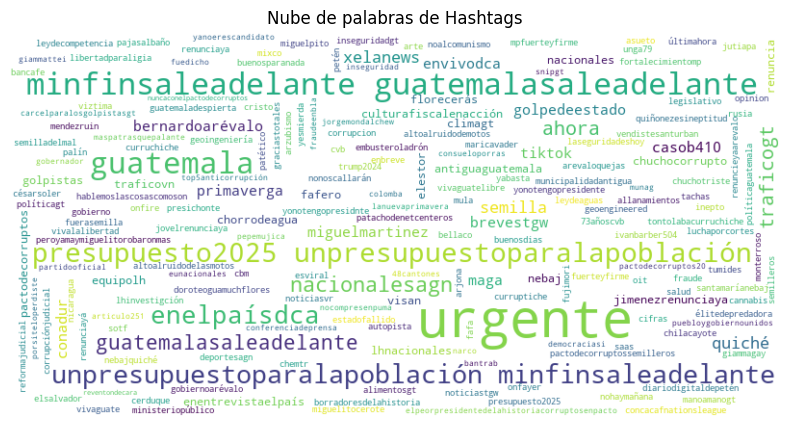

In [18]:
# Unir todos los hashtags en un solo string
hashtags_string = ' '.join(df['hashtags'].explode().dropna())

# Generar la nube de palabras
wordcloud_hashtags = WordCloud(width=800, height=400, background_color='white').generate(hashtags_string)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_hashtags, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de Hashtags')
plt.show()

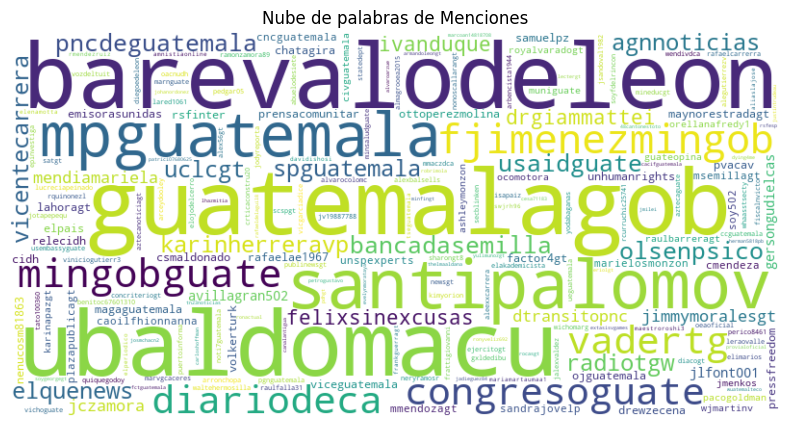

In [19]:
# Unir todas las menciones en un solo string
mentions_string = ' '.join(all_mentions.index)

# Generar la nube de palabras
wordcloud_mentions = WordCloud(width=800, height=400, background_color='white').generate(mentions_string)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_mentions, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de Menciones')
plt.show()


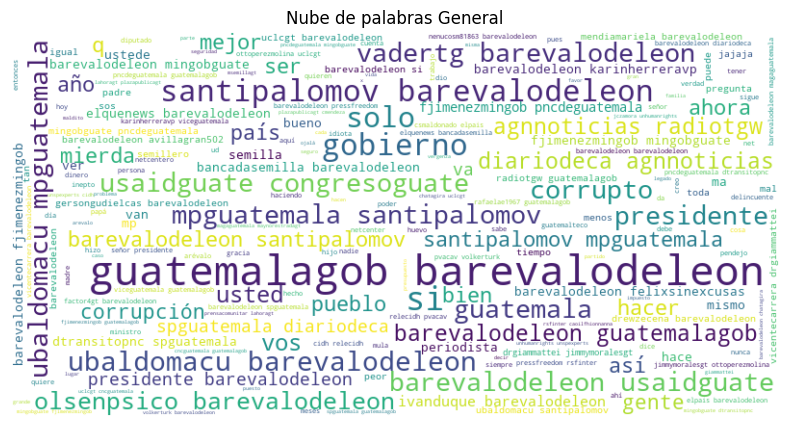

In [20]:
# Unir el contenido de todos los tweets en un solo string
tweets_string = ' '.join(df['rawContent'])

# Generar la nube de palabras
wordcloud_general = WordCloud(width=800, height=400, background_color='white').generate(tweets_string)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_general, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras General')
plt.show()


## Análisis de la Topología de la Red

Número de nodos: 3102
Número de aristas: 12243


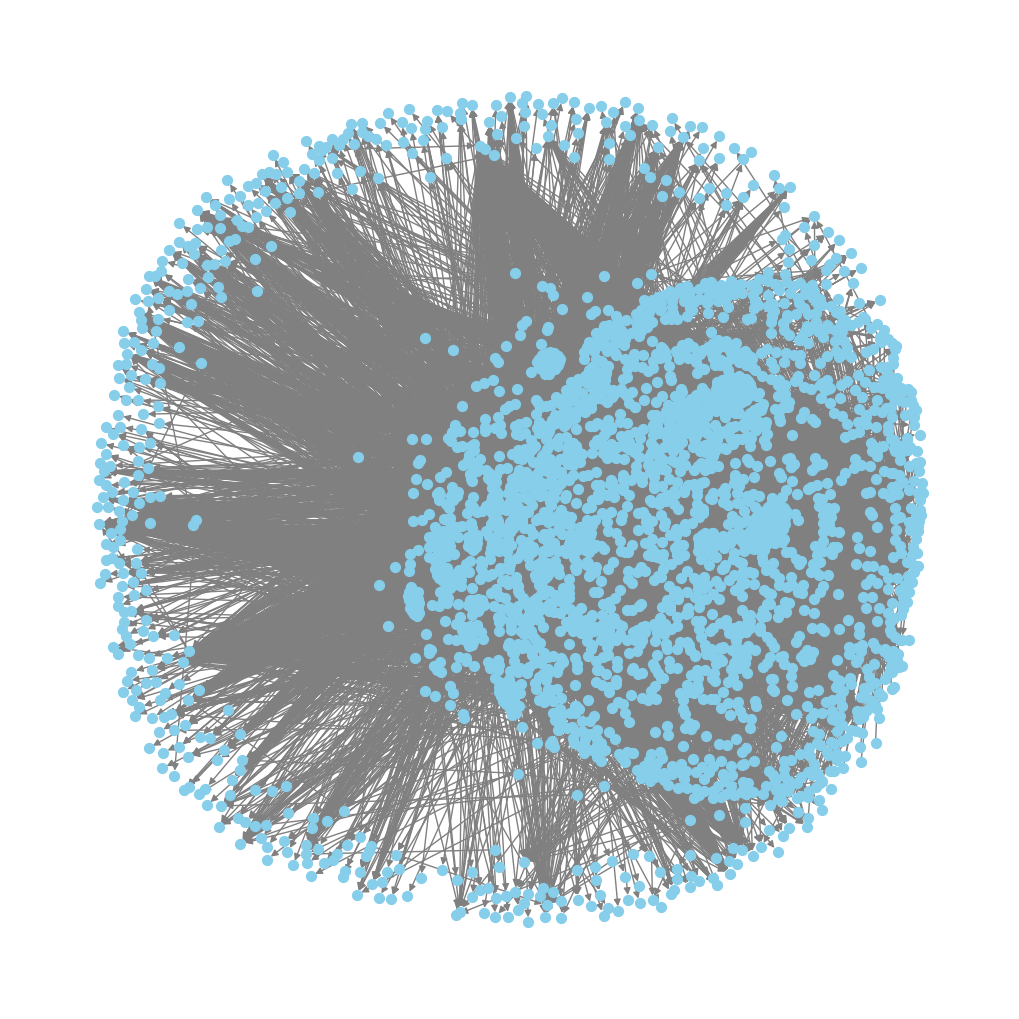

Densidad de la red: 0.0012727534700542721
La red no es conexa.
Coeficiente de agrupamiento: 0.19063158228215749


In [21]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos y aristas desde el DataFrame
for index, row in edges_df.iterrows():
    G.add_edge(row['username'], row['target_user'])

# Mostrar el número de nodos y aristas
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

# Dibujar el grafo
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.15)  # layout del grafo
nx.draw(G, pos, with_labels=False, node_size=50, node_color='skyblue', font_size=10, edge_color='gray')
plt.show()

density = nx.density(G)
print(f"Densidad de la red: {density}")

if nx.is_connected(G.to_undirected()):
    diameter = nx.diameter(G)
    print(f"Diámetro de la red: {diameter}")
else:
    print("La red no es conexa.")

clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de agrupamiento: {clustering_coefficient}")


Número de nodos: 3102
Número de aristas: 12243


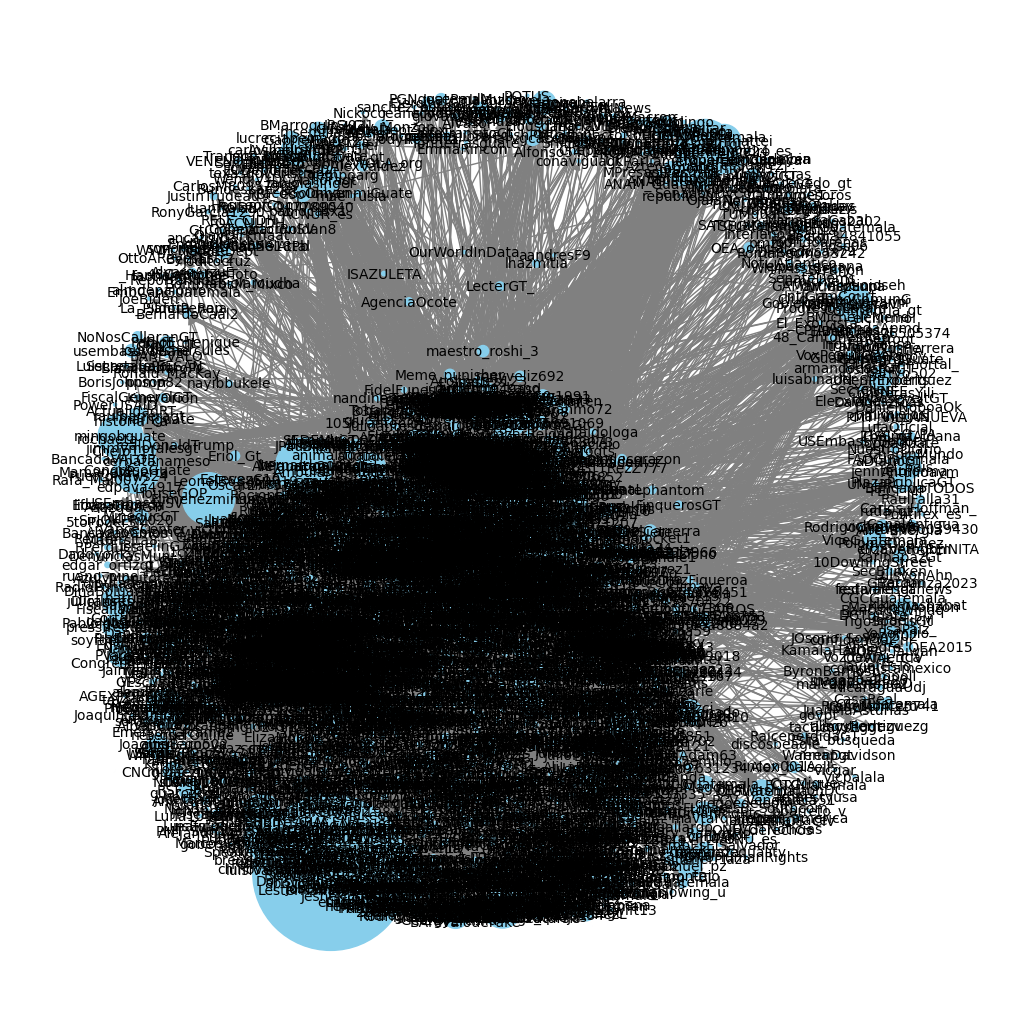

Densidad de la red: 0.0012727534700542721
La red no es conexa.
Coeficiente de agrupamiento: 0.19063158228215737


In [22]:
# Contar la cantidad de interacciones para cada usuario (como source o target)
user_counts = pd.concat([edges_df['username'], edges_df['target_user']]).value_counts()

# Crear el grafo dirigido con nodos únicos
G = nx.DiGraph()

# Añadir nodos con el atributo 'size' basado en el número de interacciones
for user, count in user_counts.items():
    G.add_node(user, size=count)

# Añadir las aristas (interacciones entre los usuarios)
for index, row in edges_df.iterrows():
    G.add_edge(row['username'], row['target_user'])

# Mostrar la cantidad de nodos y aristas
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")

labels = {user: user for user in G.nodes()}

# Extraer el tamaño de los nodos basado en el número de interacciones
node_sizes = [G.nodes[user]['size'] * 5 for user in G.nodes()]  # Multiplicamos para hacerlos más visibles

# Dibujar el grafo con nodos de tamaño proporcional a su número de interacciones
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15)  # Posición del grafo
nx.draw(G, pos, with_labels=True, labels=labels, node_size=node_sizes, node_color='skyblue', font_size=10, edge_color='gray')
plt.show()

density = nx.density(G)
print(f"Densidad de la red: {density}")

if nx.is_connected(G.to_undirected()):
    diameter = nx.diameter(G)
    print(f"Diámetro de la red: {diameter}")
else:
    print("La red no es conexa.")

clustering_coefficient = nx.average_clustering(G)
print(f"Coeficiente de agrupamiento: {clustering_coefficient}")

Número de nodos (filtrado): 1106
Número de aristas (filtrado): 7860


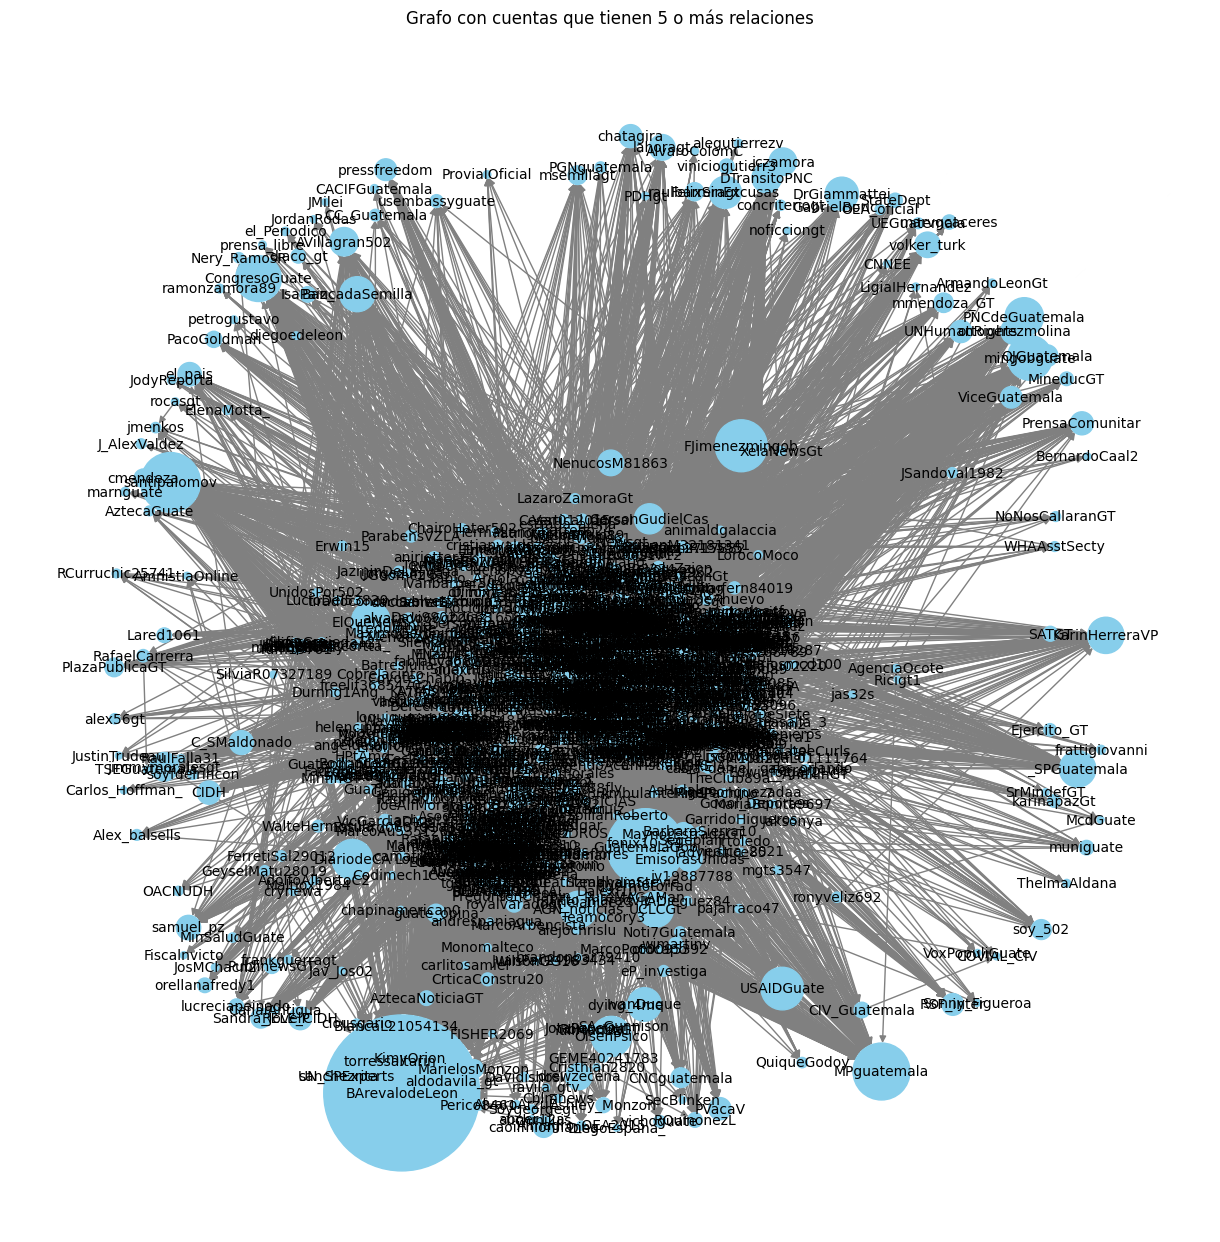

Densidad de la red: 0.006431394368847832
La red no es conexa.
Coeficiente de agrupamiento: 0.15364235028281945


In [23]:
# Crear el primer filtro para eliminar nodos con menos de 5 relaciones
user_counts_filtered = user_counts[user_counts >= 5]  # Solo usuarios con 5 o más relaciones

# Crear un nuevo grafo dirigido con nodos filtrados
G_filtered = nx.DiGraph()

# Añadir nodos con el atributo 'size' solo para usuarios que tienen 5 o más relaciones
for user, count in user_counts_filtered.items():
    G_filtered.add_node(user, size=count)

# Añadir las aristas para las interacciones solo si ambos usuarios están en el conjunto filtrado
for index, row in edges_df.iterrows():
    if row['username'] in G_filtered and row['target_user'] in G_filtered:
        G_filtered.add_edge(row['username'], row['target_user'])

# Verificar la cantidad de nodos y aristas
print(f"Número de nodos (filtrado): {G_filtered.number_of_nodes()}")
print(f"Número de aristas (filtrado): {G_filtered.number_of_edges()}")

labels = {user: user for user in G_filtered.nodes()}

# Extraer los tamaños de los nodos
node_sizes_filtered = [G_filtered.nodes[user]['size'] * 5 for user in G_filtered.nodes()]

# Dibujar el grafo filtrado
plt.figure(figsize=(12, 12))
pos_filtered = nx.spring_layout(G_filtered, k=0.15)
nx.draw(G_filtered, pos_filtered, with_labels=True, labels=labels, node_size=node_sizes_filtered, node_color='skyblue', font_size=10, edge_color='gray')
plt.title('Grafo con cuentas que tienen 5 o más relaciones')
plt.show()

density = nx.density(G_filtered)
print(f"Densidad de la red: {density}")

if nx.is_connected(G.to_undirected()):
    diameter = nx.diameter(G_filtered)
    print(f"Diámetro de la red: {diameter}")
else:
    print("La red no es conexa.")

clustering_coefficient = nx.average_clustering(G_filtered)
print(f"Coeficiente de agrupamiento: {clustering_coefficient}")

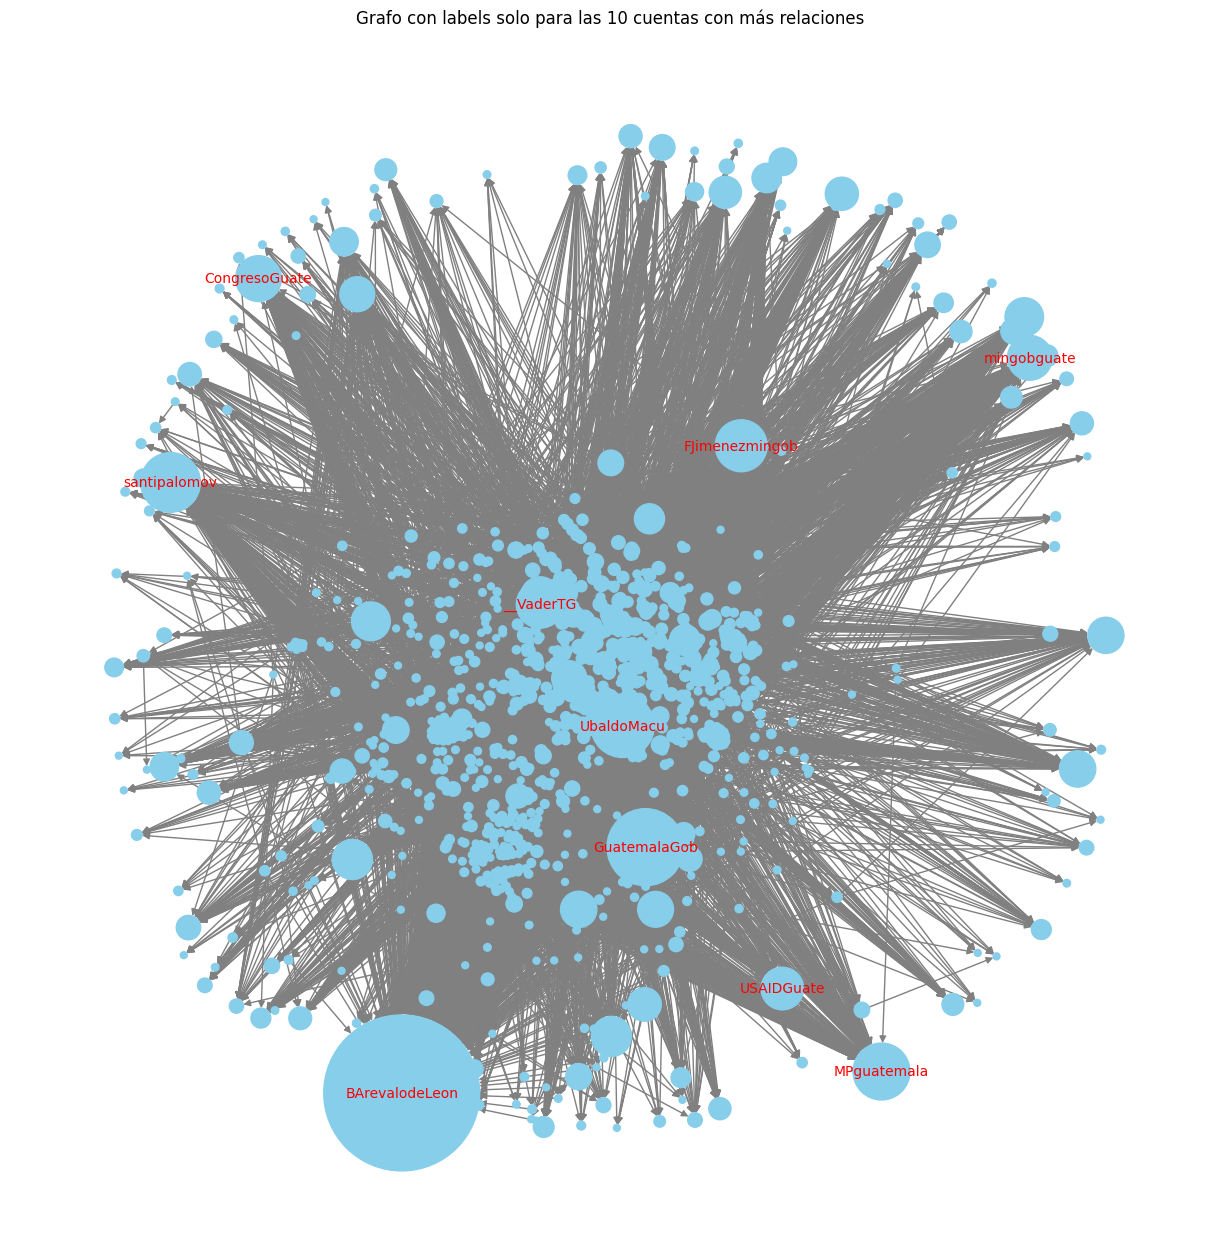

In [24]:
# Obtener los 10 usuarios con más relaciones
top_10_users = user_counts_filtered.nlargest(10).index

# Dibujar el grafo con labels solo para los top 10
plt.figure(figsize=(12, 12))
nx.draw(G_filtered, pos_filtered, with_labels=False, node_size=node_sizes_filtered, node_color='skyblue', font_size=10, edge_color='gray')

# Añadir labels solo para los top 10
top_labels = {user: user for user in top_10_users}
nx.draw_networkx_labels(G_filtered, pos_filtered, labels=top_labels, font_size=10, font_color='red')

plt.title('Grafo con labels solo para las 10 cuentas con más relaciones')
plt.show()


## Identificación y Análisis de Comunidades

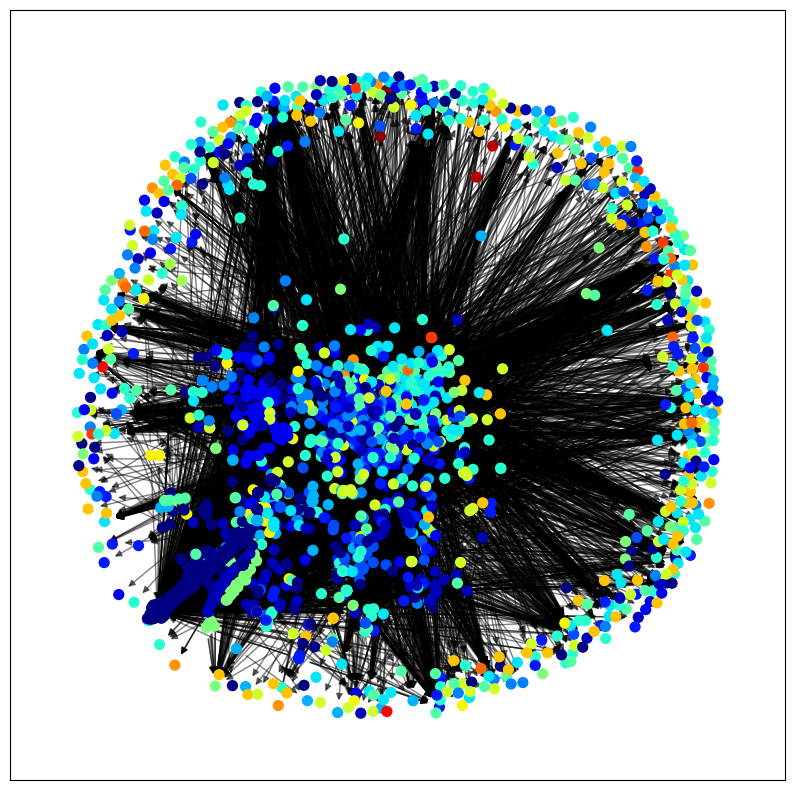

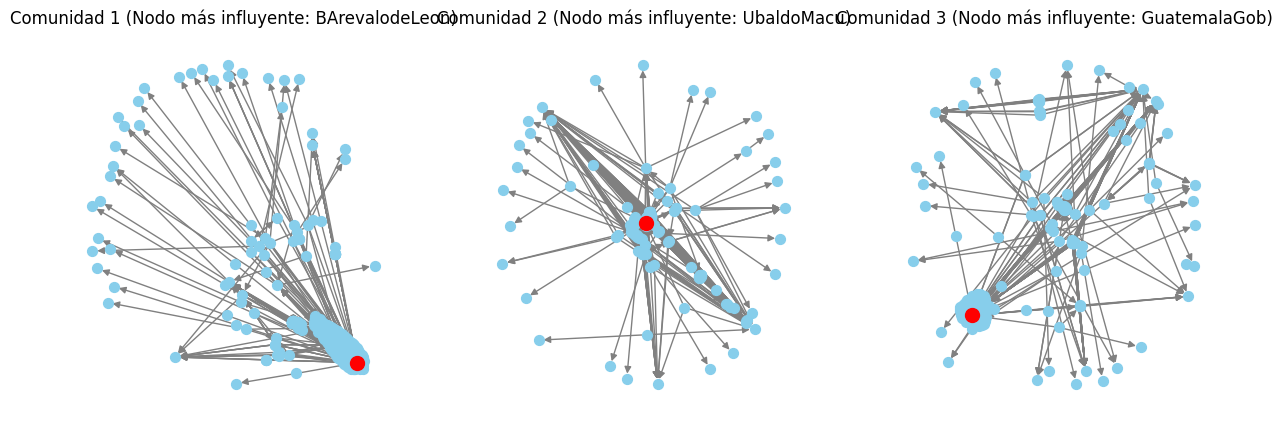

Comunidad 1:
- Tamaño: 918 nodos
- Nodo más influyente: BArevalodeLeon (Grado: 883)
- Temas principales de conversación: No disponible

Comunidad 2:
- Tamaño: 311 nodos
- Nodo más influyente: UbaldoMacu (Grado: 272)
- Temas principales de conversación: No disponible

Comunidad 3:
- Tamaño: 283 nodos
- Nodo más influyente: GuatemalaGob (Grado: 212)
- Temas principales de conversación: No disponible



In [26]:
import community.community_louvain as community_louvain

# Convertimos el grafo dirigido a no dirigido, ya que Louvain requiere un grafo no dirigido
G_undirected = G.to_undirected()

# Aplicamos el algoritmo de Louvain para detectar las comunidades
partition = community_louvain.best_partition(G_undirected)

# Añadir la comunidad detectada como un atributo de los nodos
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

# Visualización de las comunidades detectadas
plt.figure(figsize=(10, 10))

# Extraemos las posiciones de los nodos
pos = nx.spring_layout(G)

# Dibujamos los nodos, coloreados según la comunidad a la que pertenecen
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=plt.cm.jet, 
                       node_color=list(partition.values()))

# Dibujamos las aristas
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

# ------------------------------------------
# Caracterización y visualización de las 3 comunidades más grandes

# Obtener el tamaño de cada comunidad
community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = sum(1 for node in G.nodes() if G.nodes[node]['community'] == community_id)

# Ordenar las comunidades por tamaño (de mayor a menor)
top_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)[:3]

# Filtrar las 3 comunidades más grandes
top_community_ids = [community[0] for community in top_communities]
subgraphs = []

# Crear subgrafos para cada comunidad
for community_id in top_community_ids:
    nodes_in_community = [node for node in G.nodes() if G.nodes[node]['community'] == community_id]
    subgraph = G.subgraph(nodes_in_community)
    subgraphs.append(subgraph)

# Visualizar las 3 comunidades más grandes y mostrar el nodo más influyente
plt.figure(figsize=(15, 5))

for i, subgraph in enumerate(subgraphs, 1):
    plt.subplot(1, 3, i)
    pos = nx.spring_layout(subgraph)
    
    # Obtener el nodo con mayor grado (nodo más influyente)
    degrees = dict(subgraph.degree())
    max_node = max(degrees, key=degrees.get)
    
    # Visualizar la comunidad
    nx.draw(subgraph, pos, with_labels=False, node_size=50, node_color='skyblue', font_size=10, edge_color='gray')
    
    # Resaltar el nodo más influyente
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[max_node], node_size=100, node_color='red')
    
    plt.title(f'Comunidad {i} (Nodo más influyente: {max_node})')

plt.show()

# ------------------------------------------
# Caracterización de cada comunidad

for i, community_id in enumerate(top_community_ids):
    subgraph = subgraphs[i]
    size = len(subgraph)
    degrees = dict(subgraph.degree())
    max_node = max(degrees, key=degrees.get)
    
    # Imprimir caracterización de la comunidad
    print(f"Comunidad {i + 1}:")
    print(f"- Tamaño: {size} nodos")
    print(f"- Nodo más influyente: {max_node} (Grado: {degrees[max_node]})")
    
    # Si los nodos tienen información sobre temas de conversación
    topics = [G.nodes[node].get('topic', 'No disponible') for node in subgraph.nodes()]
    unique_topics = set(topics)
    print(f"- Temas principales de conversación: {', '.join(unique_topics)}\n")

## Análisis de Influencers y Nodos Clave

In [33]:
# Centralidad de grado (in-degree para menciones recibidas, out-degree para menciones realizadas)
degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Obtener los 10 usuarios con mayor centralidad de grado
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 usuarios por centralidad de grado:")
for user, centrality in top_10_degree:
    print(f"Usuario: {user}, Centralidad de grado: {centrality}")

Top 10 usuarios por centralidad de grado:
Usuario: BArevalodeLeon, Centralidad de grado: 0.8129635601418896
Usuario: GuatemalaGob, Centralidad de grado: 0.1983231215736859
Usuario: UbaldoMacu, Centralidad de grado: 0.1347952273460174
Usuario: santipalomov, Centralidad de grado: 0.11931634956465656
Usuario: MPguatemala, Centralidad de grado: 0.10835214446952596
Usuario: FJimenezmingob, Centralidad de grado: 0.09029345372460496
Usuario: __VaderTG, Centralidad de grado: 0.07578200580457917
Usuario: CongresoGuate, Centralidad de grado: 0.07029990325701387
Usuario: mingobguate, Centralidad de grado: 0.06707513705256368
Usuario: USAIDGuate, Centralidad de grado: 0.06062560464366333


In [34]:
# Centralidad de intermediación
betweenness_centrality = nx.betweenness_centrality(G)

# Obtener los 10 usuarios con mayor centralidad de intermediación
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 usuarios por centralidad de intermediación:")
for user, centrality in top_10_betweenness:
    print(f"Usuario: {user}, Centralidad de intermediación: {centrality}")


Top 10 usuarios por centralidad de intermediación:
Usuario: UbaldoMacu, Centralidad de intermediación: 0.013389541771575154
Usuario: BenitoC67601310, Centralidad de intermediación: 0.01098108942113211
Usuario: RafaelAE1967, Centralidad de intermediación: 0.005655238313194647
Usuario: __VaderTG, Centralidad de intermediación: 0.004782916640041294
Usuario: AxelGar56163124, Centralidad de intermediación: 0.002456526832680207
Usuario: anti_chairosgt, Centralidad de intermediación: 0.002255546994156287
Usuario: RafaelDelAguil8, Centralidad de intermediación: 0.0014910523883331932
Usuario: arronchopa, Centralidad de intermediación: 0.001409630013805565
Usuario: MendiaMariela, Centralidad de intermediación: 0.0011734104516739668
Usuario: wichomarg, Centralidad de intermediación: 0.0011273404153900558


In [35]:
# Centralidad de cercanía
closeness_centrality = nx.closeness_centrality(G)

# Obtener los 10 usuarios con mayor centralidad de cercanía
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 usuarios por centralidad de cercanía:")
for user, centrality in top_10_closeness:
    print(f"Usuario: {user}, Centralidad de cercanía: {centrality}")


Top 10 usuarios por centralidad de cercanía:
Usuario: BArevalodeLeon, Centralidad de cercanía: 0.8113665512205448
Usuario: GuatemalaGob, Centralidad de cercanía: 0.2658148084003832
Usuario: FJimenezmingob, Centralidad de cercanía: 0.1952424789984849
Usuario: santipalomov, Centralidad de cercanía: 0.18681202442334396
Usuario: MagaGuatemala, Centralidad de cercanía: 0.17206362597634228
Usuario: mingobguate, Centralidad de cercanía: 0.16249925619924752
Usuario: MPguatemala, Centralidad de cercanía: 0.16010247135100494
Usuario: UbaldoMacu, Centralidad de cercanía: 0.15534171658948384
Usuario: usembassyguate, Centralidad de cercanía: 0.13504475211623748
Usuario: FAOGuatemala, Centralidad de cercanía: 0.13122317862724184


## Detección y Análisis de Grupos Aislados

In [36]:
# Para un grafo dirigido:
# Detectar componentes fuertemente conectados
strongly_connected_components = list(nx.strongly_connected_components(G))
# Detectar componentes débilmente conectados
weakly_connected_components = list(nx.weakly_connected_components(G))

# Mostrar los tamaños de los componentes más grandes
strong_component_sizes = [len(component) for component in strongly_connected_components]
weak_component_sizes = [len(component) for component in weakly_connected_components]

print(f"Tamaño de los 5 componentes fuertemente conectados más grandes: {sorted(strong_component_sizes, reverse=True)[:5]}")
print(f"Tamaño de los 5 componentes débilmente conectados más grandes: {sorted(weak_component_sizes, reverse=True)[:5]}")

Tamaño de los 5 componentes fuertemente conectados más grandes: [38, 11, 6, 6, 5]
Tamaño de los 5 componentes débilmente conectados más grandes: [3093, 3, 2, 2, 2]


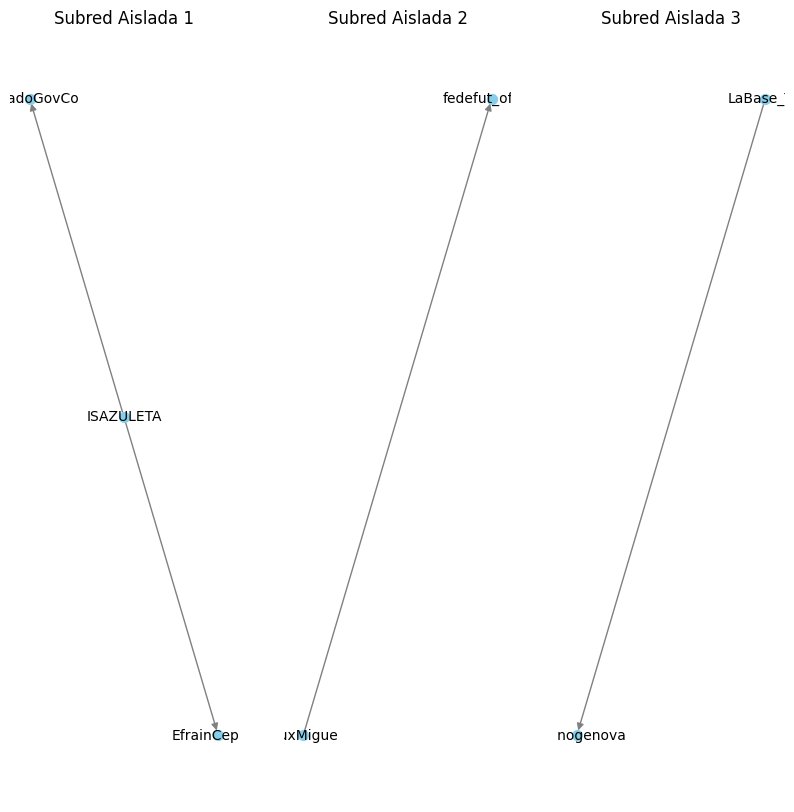

In [37]:
# Extraer uno de los componentes pequeños (subredes aisladas)
isolated_subgraphs = [G.subgraph(component) for component in weakly_connected_components if len(component) < 10]  # Filtramos los pequeños

# Visualizar una subred aislada
plt.figure(figsize=(10, 10))

for i, subgraph in enumerate(isolated_subgraphs[:3], 1):  # Visualizar las 3 subredes aisladas más pequeñas
    plt.subplot(1, 3, i)
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=10, edge_color='gray')
    plt.title(f'Subred Aislada {i}')

plt.show()

In [41]:
# Resumen del análisis de los grupos aislados
isolated_group_summary = []
for i, subgraph in enumerate(isolated_subgraphs[:3]):
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    isolated_group_summary.append({
        'Grupo': i+1,
        'Nodos': num_nodes,
        'Interacciones': num_edges
    })

import pandas as pd
isolated_group_df = pd.DataFrame(isolated_group_summary)
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Resumen de grupos aislados", dataframe=isolated_group_df)

Resumen de grupos aislados


## Análisis de Sentimientos y Contenido

In [62]:
from transformers import pipeline

# Inicializar el modelo de análisis de sentimiento multilingüe
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Aplicar el modelo a cada tweet
df['sentimiento_bert'] = df['rawContent'].apply(lambda tweet: sentiment_analyzer(tweet)[0]['label'])

# Contar cuántos tweets caen en cada categoría de sentimiento
sentiment_counts_bert = df['sentimiento_bert'].value_counts()
print("Distribución del sentimiento en los tweets con BERT:")
print(sentiment_counts_bert)

# Mostrar algunos ejemplos de tweets por sentimiento
print("\nEjemplos de tweets positivos:")
print(df[df['sentimiento_bert'] == '5 stars'].head(3))

print("\nEjemplos de tweets negativos:")
print(df[df['sentimiento_bert'] == '1 star'].head(3))


c:\Users\Alvar\OneDrive\Documentos\SemestreVIII\Data Science\Lab7DataScience\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Alvar\OneDrive\Documentos\SemestreVIII\Data Science\Lab7DataScience\myenv\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Alvar\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlin

Distribución del sentimiento en los tweets con BERT:
sentimiento_bert
1 star     3770
5 stars     957
3 stars     123
4 stars      87
2 stars       7
Name: count, dtype: int64

Ejemplos de tweets positivos:
                    id               id_str  \
3  1834280512933732694  1834280512933732694   
4  1834279986254987428  1834279986254987428   
8  1834279356719661450  1834279356719661450   

                                                 url  \
3  https://x.com/carlosalbesc/status/183428051293...   
4  https://x.com/Brenda_AGN/status/18342799862549...   
8  https://x.com/Radio_TGW/status/183427935671966...   

                        date  \
3  2024-09-12 17:18:48+00:00   
4  2024-09-12 17:16:42+00:00   
8  2024-09-12 17:14:12+00:00   

                                                user lang  \
3  {'id': 2881001877, 'id_str': '2881001877', 'ur...   es   
4  {'id': 3013862206, 'id_str': '3013862206', 'ur...   es   
8  {'id': 145724847, 'id_str': '145724847', 'url'...   es   

     

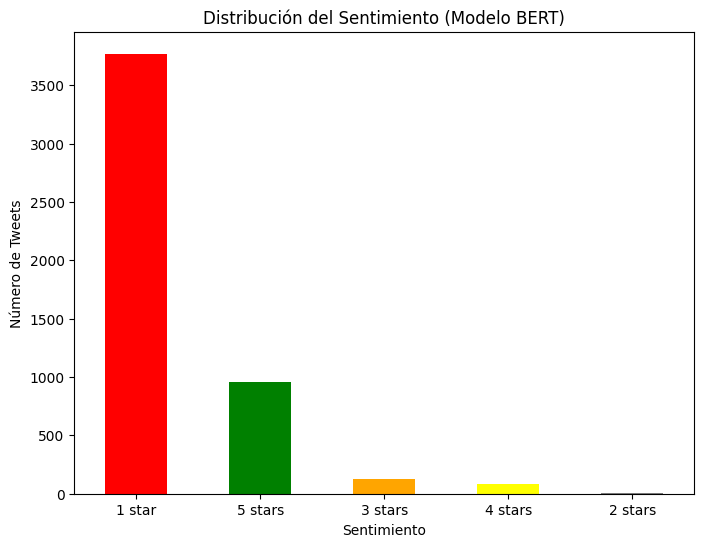

In [65]:
# Contar cuántos tweets caen en cada categoría de sentimiento
sentiment_counts_bert = df['sentimiento_bert'].value_counts()

# Crear un gráfico de barras para visualizar la distribución del sentimiento
sentiment_counts_bert.plot(kind='bar', color=['red', 'green', 'orange', 'yellow', 'grey'], figsize=(8, 6))
plt.title('Distribución del Sentimiento (Modelo BERT)')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.xticks(rotation=0)
plt.show()

In [61]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Función de análisis de sentimiento usando TextBlob
def analyze_sentiment_textblob(tweet):
    blob = TextBlob(tweet)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return 'Positivo'
    elif sentiment_polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicamos la función a cada tweet
df['sentimiento_textblob'] = df['rawContent'].apply(analyze_sentiment_textblob)

# Contar cuántos tweets caen en cada categoría de sentimiento
sentiment_counts_textblob = df['sentimiento_textblob'].value_counts()
print("Distribución del sentimiento en los tweets con TextBlob:")
print(sentiment_counts_textblob)


Distribución del sentimiento en los tweets con TextBlob:
sentimiento_textblob
Neutral     4702
Negativo     124
Positivo     118
Name: count, dtype: int64


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# Descargar stopwords en español de NLTK
nltk.download('stopwords')

# Cargar las stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Preprocesamiento: Convertir los tweets en una matriz de términos con las stopwords en español
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=spanish_stopwords)

# Ajustar el vectorizador a los tweets
X = vectorizer.fit_transform(df['rawContent'])

# Definir el modelo LDA con 5 temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Ajustar el modelo LDA a los datos
lda.fit(X)

# Mostrar los términos más importantes de cada tópico
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Tópico {idx}:")
    print([terms[i] for i in topic.argsort()[-10:]])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tópico 0:
['vicentecarrera', 'dtransitopnc', 'radiotgw', 'agnnoticias', 'spguatemala', 'pncdeguatemala', 'diariodeca', 'mingobguate', 'fjimenezmingob', 'guatemalagob']
Tópico 1:
['ser', 'sos', 'vos', 'si', 'usaidguate', 'congresoguate', 'vadertg', 'mpguatemala', 'santipalomov', 'ubaldomacu']
Tópico 2:
['karinherreravp', 'pueblo', 'bancadasemilla', 'guatemalagob', 'samuelpz', 'elquenews', 'corruptos', 'guatemala', 'gobierno', 'si']
Tópico 3:
['ojguatemala', 'país', 'avillagran502', 'gobierno', 'elquenews', 'si', 'olsenpsico', 'presidente', 'jczamora', 'bancadasemilla']
Tópico 4:
['uclcgt', 'olsenpsico', 'si', 'vicentecarrera', 'ottoperezmolina', 'felixsinexcusas', 'jimmymoralesgt', 'presidente', 'guatemalagob', 'drgiammattei']


Tópico 0:


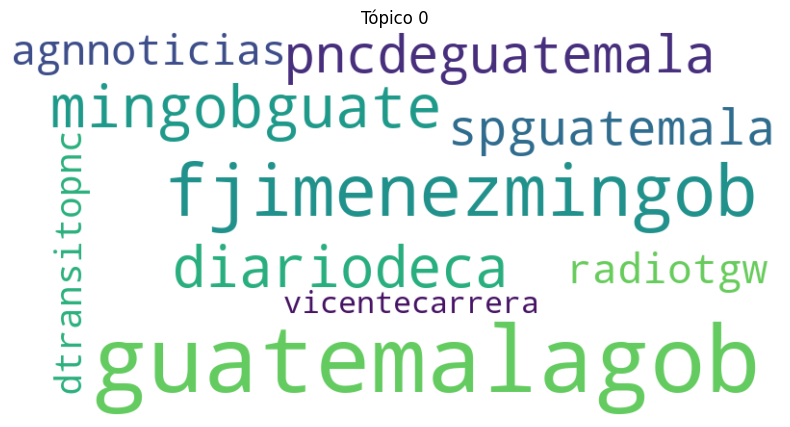

Tópico 1:


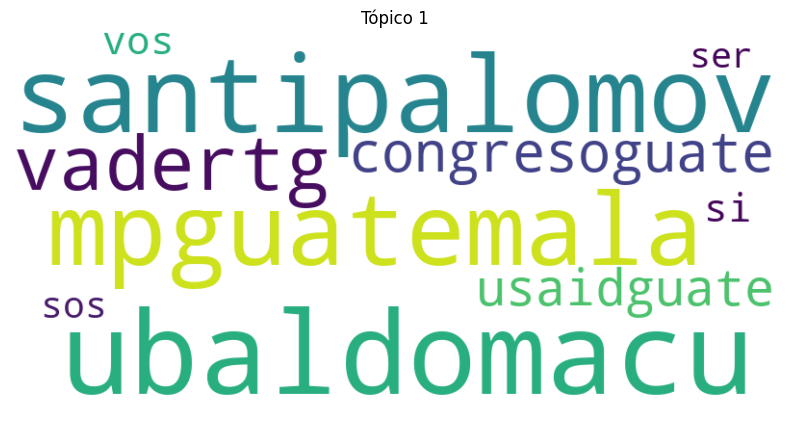

Tópico 2:


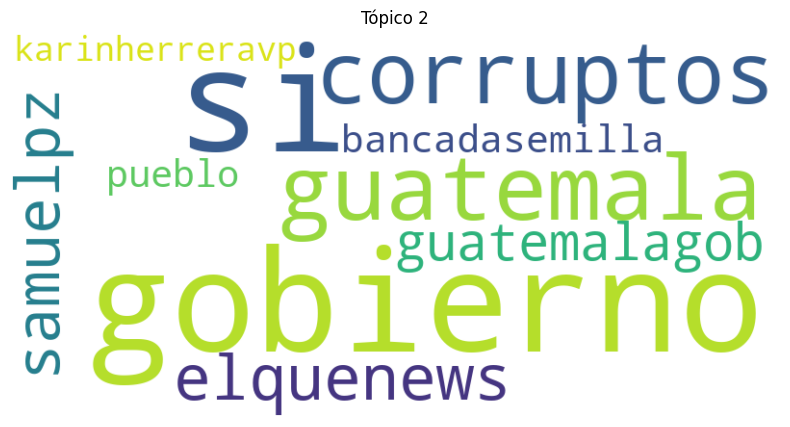

Tópico 3:


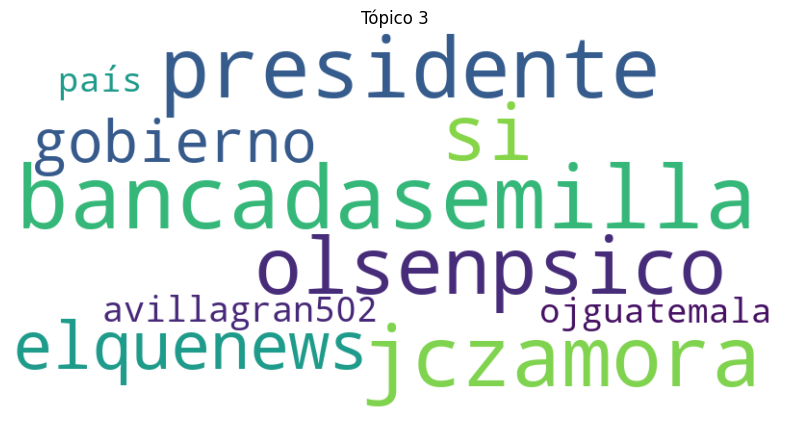

Tópico 4:


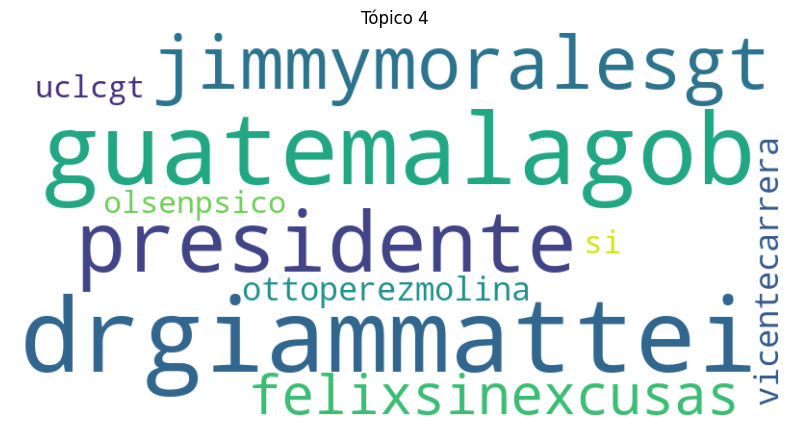

In [58]:
# Generar una nube de palabras para cada tópico
terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Tópico {idx}:")
    
    # Crear un diccionario de palabras y pesos
    topic_terms = {terms[i]: topic[i] for i in topic.argsort()[-10:]}
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_terms)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Tópico {idx}")
    plt.show()